# Test Scripts: for SPIKE Prime

Use this Jupyter Notebook to test out your Raspberry Pi to make sure it is working proper. This also tests out an attached SPIKE Prime Robot (from LEGO Education).

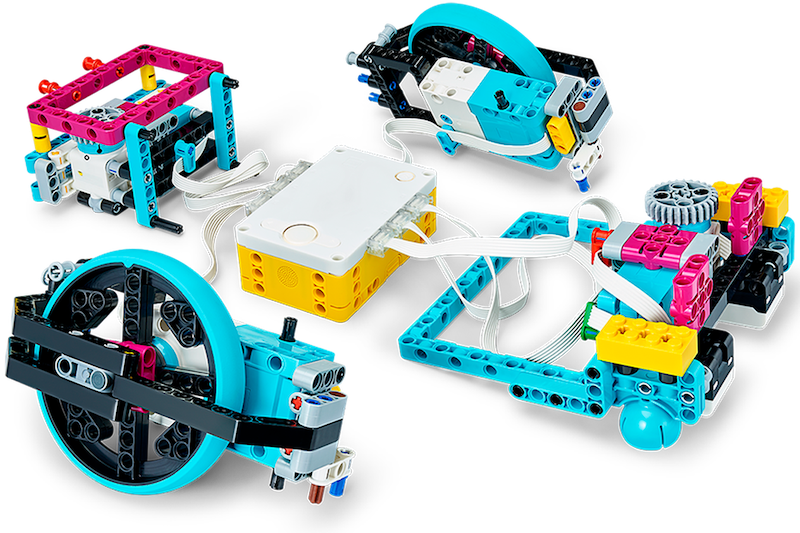

## 1: Simple Python
Run the following Code Block (select and hit "Run" above) to print `Hello World`.

In [4]:
print("Hello World")

Hello World


## 2: `import time`

We'll want the `time` module for later.  Import time here and it should print numbers one a second.

In [6]:
import time
print(1)
time.sleep(1)
print(2)
time.sleep(1)
print(3)

1
2
3


## 3: Importing SPIKE Prime Serial Code
Run the following code to set up the attached SPIKE Prime.

In [3]:
# import the serial communication module (for talking to SPIKE Prime)
from SPIKEPrimeSerial.Serial import SPIKEPrimeSerial as SPIKE

# if imported properly, you should be able to create a new SPIKE Prime Serial object:
mySPIKE = SPIKE()
print('SPIKE Prime Serial Object Created.')
print('Connected (available) devices:', mySPIKE.ListDevices())

SPIKE Prime Serial Object Created.
Connected (available) devices: ['/dev/ttyACM0']


## 4. Open Serial Connection

This will attempt to open a Serial Connection to the attached SPIKE Prime.

If it initializes and connects properly, it should show a "check" on the front of the SPIKE Prime.

By default, it connects to the first device on the list (`mySPIKE.ListDevices()`).

You can overwrite this by specifying a port: e.g. `mySPIKE.OpenSerial(port='/dev/ttyACM1')`

In [4]:
# open a Serial Connection to your SPIKE Prime
name = mySPIKE.OpenSerial()
print('Connected to:',name)

Connected to: /dev/ttyACM0


## 5. Check Connection and Device

Check the battery levels (voltage and temp), check the SPIKE Prime Accelerometer, and make the SPIKE Prime beep as means of checking the connection and device.

In [6]:
val = mySPIKE.GetValue('hub.battery.voltage()')
print('SPIKE Prime Voltage:',val,'millivolts')

val = mySPIKE.GetValue('hub.battery.temperature()')
print('SPIKE Prime Temperature:',val,'Celsius')

val = mySPIKE.GetValue('hub.motion.accelerometer()')
print('X,Y,Z acceleration:',val)

print('Beeeeeep!')
mySPIKE.SendCommand('hub.sound.beep()')

SPIKE Prime Voltage: ... millivolts
SPIKE Prime Temperature: ... Celsius
X,Y,Z acceleration: ...
Beeeeeep!


## 6. Test the SPIKE Prime Display

Play with the display on the SPIKE Prime:

- Scroll the text "Hello"
- Show a smile/frown face
- Show a rotating clock

In [7]:
# display text across the screen
mySPIKE.SendCommand('hub.display.show("Hello ", fade=4)')
time.sleep(3)

# display alternating happy/sad faces
for i in range(4):
    mySPIKE.SendCommand('hub.display.show(hub.Image.HAPPY)')
    time.sleep(0.5)
    mySPIKE.SendCommand('hub.display.show(hub.Image.SAD)')
    time.sleep(0.5)

# display a clock hand going around
for j in range(3):
    for i in range(12):
        clock_val = 'hub.Image.CLOCK' + str(i+1)
        mySPIKE.SendCommand('hub.display.show(' + clock_val + ')')
        time.sleep(0.1)

## 7. Test the SPIKE Prime Distance Sensor

Plug a Distance Sensor into Port C.  The following code takes 10 readings (once every 0.5 seconds, so for 5 seconds total).

In [ ]:
# SPIKE Prime Distance Sensor plugged into Port C

# set the mode:
mySPIKE.SendCommand('hub.port.C.device.mode(0)')

# take readings
for i in range(10):
    val = mySPIKE.GetValue('hub.port.C.device.get()')
    print('Distance:',val,'cm')
    time.sleep(0.5)

## 8. Test the SPIKE Prime Force Sensor

Plug a Distance Sensor into Port D.  The following code takes 10 readings (once every 0.5 seconds, so for 5 seconds total).

In [ ]:
# SPIKE Prime Force Sensor plugged into Port D
for i in range(10):
    val = mySPIKE.GetValue('hub.port.D.device.get()')
    print('Force:',val,'N')
    time.sleep(0.5)

## 9. Define some movement functions

Motors are in Ports A and B.

You may need to adjust the sign (positive or negative) of the motor values to get to move in the appropriate direction (depending on your hardware configuration).

In [ ]:
# two motors are plugged into ports A and B
# the configuration of MY specific hardware is that:
# - positive numbers drive the Port A motor forward
# - negative numbers drive the Port B motor forward

def forward(power = 100):
    mySPIKE.SendCommand('hub.display.show("F")')
    mySPIKE.SendCommand('hub.port.A.motor.run_at_speed(' + str(power) + ')')
    mySPIKE.SendCommand('hub.port.B.motor.run_at_speed(' + str(power*-1) + ')')
    return

def backward(power = 100):
    mySPIKE.SendCommand('hub.display.show("B")')
    mySPIKE.SendCommand('hub.port.A.motor.run_at_speed(' + str(power*-1) + ')')
    mySPIKE.SendCommand('hub.port.B.motor.run_at_speed(' + str(power) + ')')
    return

def spinright(power = 100):
    mySPIKE.SendCommand('hub.display.show(hub.Image.ARROW_E)')
    mySPIKE.SendCommand('hub.port.A.motor.run_at_speed(' + str(power) + ')')
    mySPIKE.SendCommand('hub.port.B.motor.run_at_speed(' + str(power) + ')')
    return

def spinleft(power = 100):
    mySPIKE.SendCommand('hub.display.show(hub.Image.ARROW_W)')
    mySPIKE.SendCommand('hub.port.A.motor.run_at_speed(' + str(power*-1) + ')')
    mySPIKE.SendCommand('hub.port.B.motor.run_at_speed(' + str(power*-1) + ')')
    return

def stop():
    mySPIKE.SendCommand('hub.display.show("S")')
    mySPIKE.SendCommand('hub.port.A.motor.brake()')
    mySPIKE.SendCommand('hub.port.B.motor.brake()')
    mySPIKE.SendCommand('hub.port.A.motor.float()')
    mySPIKE.SendCommand('hub.port.B.motor.float()')
    return

## 10. Now move!

Now we can make the robot move. Execute the appropriate cell to make it move in different ways.

In [7]:
# forward one sec, wait one sec, backward one sec
forward()
time.sleep(1)
stop()
time.sleep(1)
backward()
time.sleep(1)
stop()

NameError: name 'forward' is not defined

In [ ]:
# spin left, spin right
spinleft()
time.sleep(2)
stop()
time.sleep(1)
spinright()
time.sleep(2)
stop()

## 11. Close Serial Connection

When done, always make sure you close the Serial Connection at the end of your code!

In [8]:
mySPIKE.CloseSerial()
print('Serial Closed')

Serial Closed


## 12. It all together!

Here is all the connect, display, and disconnect code all in one place"

In [9]:
import time
# import the serial communication module (for talking to SPIKE Prime)
from SPIKEPrimeSerial.Serial import SPIKEPrimeSerial as SPIKE

mySPIKE = SPIKE()
# open a Serial Connection to your SPIKE Prime
name = mySPIKE.OpenSerial()
print('Connected to:',name)

# display happy for one second
mySPIKE.SendCommand('hub.display.show(hub.Image.HAPPY)')
time.sleep(1)

mySPIKE.CloseSerial()
print('Closed Connection')

Connected to: /dev/ttyACM0
Closed Connection


# *Advanced!*

## 13. Multiple SPIKE Prime Bricks

Do you have more than one SPIKE Prime Brick?  Plug them into your Raspberry Pi and try connecting to all of them at the same time.

In [10]:
import time
# import the serial communication module (for talking to SPIKE Prime)
from SPIKEPrimeSerial.Serial import SPIKEPrimeSerial as SPIKE

mySPIKE1 = SPIKE()
mySPIKE2 = SPIKE()
#mySPIKE3 = SPIKE()

brick1 = mySPIKE1.ListDevices()[1]
brick2 = mySPIKE1.ListDevices()[0]
#brick3 = mySPIKE1.ListDevices()[2]

mySPIKE1.OpenSerial(brick1)
mySPIKE2.OpenSerial(brick2)
#mySPIKE3.OpenSerial(brick3)

time.sleep(1)

text = "Hello Students   "
time_delay = 0.43

mySPIKE1.SendCommand('hub.display.show("' + str(text) + '", fade=4)')
time.sleep(time_delay)
mySPIKE2.SendCommand('hub.display.show("' + str(text) + '", fade=4)')
#time.sleep(time_delay)
#mySPIKE3.SendCommand('hub.display.show("' + str(text) + '", fade=4)')

time.sleep(2)

mySPIKE1.CloseSerial()
mySPIKE2.CloseSerial()
#mySPIKE3.CloseSerial()

IndexError: list index out of range